# Part I: Explorating Loan Data From Prosper
## By Madu Ikechukwu

## Table of Contents

1. Introduction

2. Data Wrangling
* Importing libraries
* Loading dataset
* Cleaning data
* Storing data

3. Exploratory Data Analysis
* Univariate Exploration
* Bivariate Exploration
* Multivariate Exploration

4. Reporting

5. Conclusions

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
The following variables were selected after data cleaning for further analysis:


## Preliminary Wrangling
The data wrangling processes are employed for further exploratory data analysis.

### Importing python packages and loading dataset

In [1]:
# Import all libraries and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

In [2]:
# Loading of dataset
loan_data = pd.read_csv('Downloads/prosperLoanData.csv')

# Viweing of data
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Assessing and cleaning dataset

In [3]:
# Ckecking of dataset properties
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# Checking for null values in dataset
loan_data.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [5]:
# Checking for duplicates in the dataset
print('Number of duplicates are:', loan_data.duplicated().sum())

Number of duplicates are: 0


In [6]:
# Checking for duplicates in key variables of the dataset
print('Number of duplicates are:', loan_data[['ListingKey','ListingNumber']].duplicated().sum())

Number of duplicates are: 871


In [7]:
# Making a copy of the original dataset
loan_data_clean = loan_data.copy()

In [8]:
# List of columns to drop from dataframe
dropped_col = ['ListingKey','ListingCreationDate','CreditGrade','ClosedDate','EstimatedEffectiveYield',
              'EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)',
              'EmploymentStatusDuration','CurrentlyInGroup','GroupKey','DateCreditPulled','CreditScoreRangeLower',
              'CreditScoreRangeUpper','FirstRecordedCreditLine','CurrentCreditLines','OpenCreditLines',
              'TotalCreditLinespast7years','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment',
               'InquiriesLast6Months','TotalInquiries','CurrentDelinquencies','IsBorrowerHomeowner',
              'DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance',
              'BankcardUtilization','AvailableBankcardCredit','TotalTrades','TradesOpenedLast6Months',
               'DebtToIncomeRatio','IncomeRange','IncomeVerifiable','StatedMonthlyIncome',
              'ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent',
               'LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination','LoanNumber','LoanOriginationQuarter',
              'MemberKey','MonthlyLoanPayment','LP_CustomerPayments','LP_CustomerPrincipalPayments',
               'LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss',
              'LP_NonPrincipalRecoverypayments','PercentFunded','Recommendations','InvestmentFromFriendsCount',
              'InvestmentFromFriendsAmount','Investors','TradesNeverDelinquent (percentage)','LoanKey']

# Dropping columns not needed for further analysis
loan_data_clean.drop(columns=dropped_col, axis=1, inplace=True)

In [9]:
# Viewing the dataframe
loan_data_clean.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,AmountDelinquent,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,LoanOriginalAmount,LoanOriginationDate
0,193129,36,Completed,0.16516,0.1580,0.1380,NaN,0,CO,Other,Self-employed,472.0,NaN,NaN,NaN,NaN,NaN,NaN,9425,2007-09-12 00:00:00
1,1209647,36,Current,0.12016,0.0920,0.0820,7.0,2,CO,Professional,Employed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,10000,2014-03-03 00:00:00
2,81716,36,Completed,0.28269,0.2750,0.2400,NaN,0,GA,Other,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3001,2007-01-17 00:00:00
3,658116,36,Current,0.12528,0.0974,0.0874,9.0,16,GA,Skilled Labor,Employed,10056.0,NaN,NaN,NaN,NaN,NaN,NaN,10000,2012-11-01 00:00:00
4,909464,36,Current,0.24614,0.2085,0.1985,4.0,2,MN,Executive,Employed,0.0,1.0,11.0,11.0,0.0,0.0,11000.0,15000,2013-09-20 00:00:00


In [10]:
# Dropping rows with duplicates
loan_data_clean.drop_duplicates(inplace=True)

In [11]:
# Dropping rows with null values
loan_data_clean.dropna(inplace=True)

In [12]:
# Converting datatype of some columns to integer
loan_data_clean[['ProsperScore','AmountDelinquent','TotalProsperLoans',
                 'TotalProsperPaymentsBilled','OnTimeProsperPayments',
                 'ProsperPaymentsLessThanOneMonthLate']]= loan_data_clean[['ProsperScore','AmountDelinquent',
                                                                           'TotalProsperLoans','TotalProsperPaymentsBilled',
                                                                           'OnTimeProsperPayments',
                                                                           'ProsperPaymentsLessThanOneMonthLate']].astype(int)


In [13]:
# Converting LoanOriginationDate to datetime and year datatype
loan_data_clean.LoanOriginationDate = pd.to_datetime(loan_data_clean['LoanOriginationDate']).dt.year

In [14]:
# Converting the ListingNumber to string as this is more of unique ID given to borrowers
loan_data_clean.ListingNumber = loan_data_clean.ListingNumber.astype(str)

In [15]:
# Rename ListingCategory
loan_data_clean.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [16]:
# Defining a function to convert ListingCategory into categorical data
list_cat = {0: 'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business',
           4:'Personal Loan',5:'Student Use',6:'Auto',7:'Other', 8:'Baby&Adoption',
           9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',
           14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',18:'Taxes',
           19:'Vacation',20:'Wedding Loans'}

def list_ct_ext(i):
    if i in list_cat.keys():
        return list_cat[i]
    else:
        return i
               
# Applying the function to ListingCategory
loan_data_clean['ListingCategory'] = loan_data_clean['ListingCategory'].apply(lambda x: list_ct_ext(x))

In [17]:
# Checking the effect of the function
loan_data_clean['ListingCategory'].unique()

array(['Home Improvement', 'Auto', 'Debt Consolidation', 'Other',
       'Vacation', 'Household Expenses', 'Business', 'Engagement Ring',
       'Large Purchases', 'Taxes', 'Medical/Dental', 'Wedding Loans',
       'Boat', 'Not Available', 'Baby&Adoption', 'Motorcycle',
       'Student Use', 'Green Loans', 'RV', 'Cosmetic Procedure'],
      dtype=object)

In [18]:
# Converting ListingCategory into ordered categorical variable
ordinal_list_cat = ['Not Available','Debt Consolidation','Home Improvement','Business', 'Student Use','Auto',
                    'Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans',
                    'Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes',
                    'Vacation','Wedding Loans']

lst_cat = pd.api.types.CategoricalDtype(ordered=True, categories = ordinal_list_cat)
loan_data_clean['ListingCategory'] = loan_data_clean['ListingCategory'].astype(lst_cat)

In [19]:
# Re-assessing the cleaned dataset
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19771 entries, 4 to 113935
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   ListingNumber                        19771 non-null  object  
 1   Term                                 19771 non-null  int64   
 2   LoanStatus                           19771 non-null  object  
 3   BorrowerAPR                          19771 non-null  float64 
 4   BorrowerRate                         19771 non-null  float64 
 5   LenderYield                          19771 non-null  float64 
 6   ProsperScore                         19771 non-null  int32   
 7   ListingCategory                      19771 non-null  category
 8   BorrowerState                        19771 non-null  object  
 9   Occupation                           19771 non-null  object  
 10  EmploymentStatus                     19771 non-null  object  
 11  AmountDelinque

In [20]:
# Taking the descriptive statistics for numeric variables
loan_data_clean.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,AmountDelinquent,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,LoanOriginalAmount,LoanOriginationDate
count,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000
mean,42.245511,0.220972,0.191303,0.181298,6.172323,1229.687016,1.460118,24.297001,23.582823,0.661272,0.052906,8753.542002,7874.633908,2011.941935
std,11.754228,0.082770,0.077874,0.077868,2.712603,7976.837006,0.788810,19.753993,19.334022,2.572397,0.584605,7534.419427,5405.165934,1.241121
min,12.000000,0.045830,0.040000,0.030000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,2009.000000
25%,36.000000,0.153240,0.126900,0.116900,4.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,3796.580000,4000.000000,2011.000000
50%,36.000000,0.214740,0.184500,0.174500,6.000000,0.000000,1.000000,18.000000,17.000000,0.000000,0.000000,6408.620000,6500.000000,2012.000000
75%,60.000000,0.287040,0.254900,0.244900,8.000000,0.000000,2.000000,35.000000,34.000000,0.000000,0.000000,11737.500000,11000.000000,2013.000000
max,60.000000,0.413550,0.360000,0.340000,11.000000,284169.000000,8.000000,141.000000,141.000000,42.000000,21.000000,72499.000000,35000.000000,2014.000000


### Storing dataset

In [21]:
# Saving the cleaned dataset 
loan_data_clean.to_csv('Desktop/loan_data_clean.csv', index=False)

### What is the structure of your dataset?

At the end of data cleaning, there are 19771 loan applicants with 20 features or variables. The data types of the variables are:
* Number of qualitative variables: 6
* Number of quantitative variables: 14

### What are the main features of interest in the `Loan Data From Prosper`?

The main features of interest in the `Loan Data From Prosper` are:
* What factors affect a loan’s outcome status?
* What affects the borrower’s APR or interest rate?
* Does the ProsperScore affect the loan status? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the employment status should have a significant impact on the loan outcome, either in the direction of repayment or in the direction of the amount of loans taken.

## Univariate Exploration 

#### Univariate charts for qualitative variables
I will begin by plotting the categorical variables to understand the patterns for further analysis.

The maximum loans yet to be paid is in Current status with loan count: 10856
The minimum loans yet to be paid is in Past Due (>120 days) status with loan count: 5
The maximum loans taken is in Employed status with loan count: 13157
The minimum loans taken is in Not employed status with loan count: 116
Borrowers in Debt Consolidation category took largest loan with count: 10431
Borrowers in Cosmetic Procedure category took least loan with count: 9


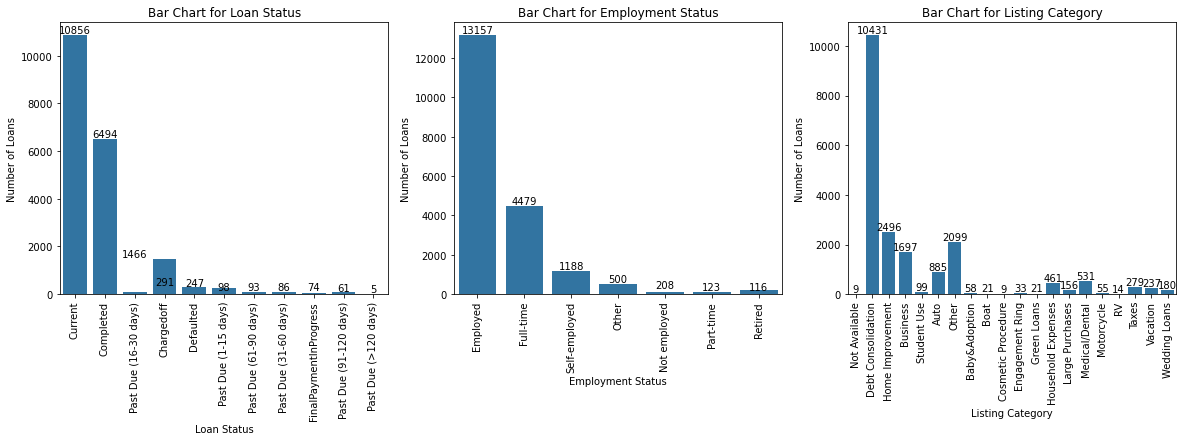

In [37]:
# Making bar charts of the categorical variables
plt.figure(figsize=[20,5])
base_color = sns.color_palette()[0]

# Bar chart for LoanStatus
plt.subplot(1,3,1)
sns.countplot(data=loan_data_clean, x='LoanStatus' , color = base_color)
plt.title('Bar Chart for Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
print('The maximum loans yet to be paid is in {} status'.format(loan_data_clean.LoanStatus.value_counts().idxmax()),
      'with loan count:',loan_data_clean.LoanStatus.value_counts().max())
print('The minimum loans yet to be paid is in {} status'.format(loan_data_clean.LoanStatus.value_counts().idxmin()),
      'with loan count:',loan_data_clean.LoanStatus.value_counts().min())
print('='*80);
# Printing value on each bar
freq = loan_data_clean.LoanStatus.value_counts()
for i in range(len(freq)):
    count = freq[i]
    plt.text(i,count,count, ha='center', va='bottom');


# Bar chart for EmploymentStatus
plt.subplot(1,3,2)
sns.countplot(data=loan_data_clean, x='EmploymentStatus' , color = base_color)
plt.title('Bar Chart for Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
print('The maximum loans taken is in {} status'.format(loan_data_clean.EmploymentStatus.value_counts().idxmax()),
      'with loan count:',loan_data_clean.EmploymentStatus.value_counts().max())
print('The minimum loans taken is in {} status'.format(loan_data_clean.EmploymentStatus.value_counts().idxmin()),
      'with loan count:',loan_data_clean.EmploymentStatus.value_counts().min())
print('='*80);

# Printing value on each bar
freq = loan_data_clean.EmploymentStatus.value_counts()
for i in range(len(freq)):
    count = freq[i]
    plt.text(i,count,count, ha='center', va='bottom');
    
# Bar chart for ListingCategory
plt.subplot(1,3,3)
ax = sns.countplot(data=loan_data_clean, x='ListingCategory' , color = base_color)
plt.title('Bar Chart for Listing Category')
plt.xlabel('Listing Category')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
print('Borrowers in {} category took largest loan'.format(loan_data_clean.ListingCategory.value_counts().idxmax()),
      'with count:',loan_data_clean.ListingCategory.value_counts().max())
print('Borrowers in {} category took least loan'.format(loan_data_clean.ListingCategory.value_counts().idxmin()),
      'with count:',loan_data_clean.ListingCategory.value_counts().min());

# Printing value on each bar for ListingCategory
ax.bar_label(ax.containers[0]) ;

CA has the maximum borrowers with count: 2482
WY has the minimum borrowers with count: 29


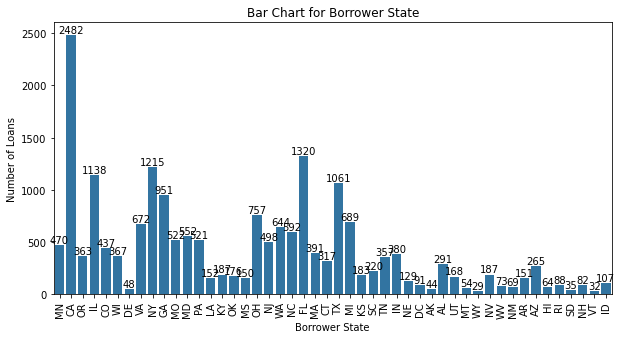

In [38]:
# Bar chart for BorrowerState
plt.figure(figsize=[10,5])
# Bar chart for BorrowerState
ax = sns.countplot(data=loan_data_clean, x='BorrowerState', color= base_color)
plt.title('Bar Chart for Borrower State')
plt.xlabel('Borrower State')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)

# Printing values on the bars
ax.bar_label(ax.containers[0])

print('{} has the maximum borrowers'.format(loan_data_clean.BorrowerState.value_counts().idxmax()),
      'with count:',loan_data_clean.BorrowerState.value_counts().max())
print('{} has the minimum borrowers'.format(loan_data_clean.BorrowerState.value_counts().idxmin()),
      'with count:',loan_data_clean.BorrowerState.value_counts().min());

### Summary of chart from qualitative variables

* For Loan Status variable: I found out that there were high number on the side of current loans, although these loans have not defaulted yet. 5 loans have exceeded the past due date of 120 days- this is a bad loan to the organization.
* Employment status: Borrowers that are employed took the highest number of loans, while unemployed borrowers took the least loan.
* Listing Category: Largest proportion of the loans were taken by borrowers who were already indebted to other loans elsewhere. The least loan was taken by borrowers in the cosmetic procedure

#### Univariate charts for quantitative variables

I shall proceed to plotting charts for quantitative variables

36 Term of loans has the highest loans with count: 13690
12 Term of loans has the lowest loans with loan count: 468
APR with value 34.6% has the highest loans with count: 406
APR with value 14.1% has the lowest loans with count: 1
Interest Rate with value 31.0% has the highest loans with count: 459
Interest Rate with value 16.4% has the lowest loans with count: 1


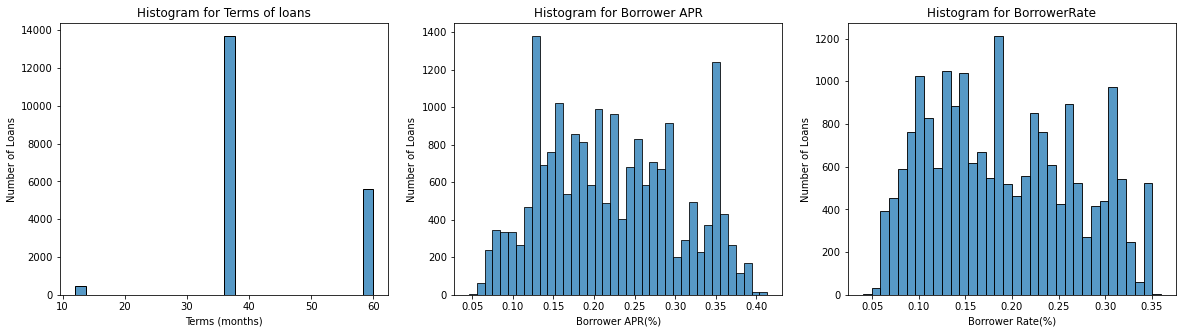

In [24]:
plt.figure(figsize=[20,5])
base_color = sns.color_palette()[0]

# Histogram for Terms of loans
plt.subplot(1,3,1)
sns.histplot(data=loan_data_clean, x='Term' , color = base_color)
plt.title('Histogram for Terms of loans')
plt.xlabel('Terms (months)')
plt.ylabel('Number of Loans')
print('{} Term of loans has the highest loans'.format(loan_data_clean.Term.value_counts().idxmax()),
      'with count:',loan_data_clean.Term.value_counts().max())
print('{} Term of loans has the lowest loans'.format(loan_data_clean.Term.value_counts().idxmin()),
      'with loan count:',loan_data_clean.Term.value_counts().min())
print('='*80);

# Histogram for BorrowerAPR
plt.subplot(1,3,2)
sns.histplot(data=loan_data_clean, x='BorrowerAPR' , color = base_color)
plt.title('Histogram for Borrower APR')
plt.xlabel('Borrower APR(%)')
plt.ylabel('Number of Loans')
print('APR with value {}% has the highest loans'.format(round(loan_data_clean.BorrowerAPR.value_counts().idxmax()*100,1)),
      'with count:',loan_data_clean.BorrowerAPR.value_counts().max())
print('APR with value {}% has the lowest loans'.format(round(loan_data_clean.BorrowerAPR.value_counts().idxmin()*100,1)),
      'with count:',loan_data_clean.BorrowerAPR.value_counts().min())
print('='*80);

# Histogram for BorrowerRate
plt.subplot(1,3,3)
sns.histplot(data=loan_data_clean, x='BorrowerRate' , color = base_color)
plt.title('Histogram for BorrowerRate')
plt.xlabel('Borrower Rate(%)')
plt.ylabel('Number of Loans')
print('Interest Rate with value {}% has the highest loans'.format(round(loan_data_clean.BorrowerRate.value_counts().idxmax()*100,1)),
      'with count:',loan_data_clean.BorrowerRate.value_counts().max())
print('Interest Rate with value {}% has the lowest loans'.format(round(loan_data_clean.BorrowerRate.value_counts().idxmin()*100,1)),
      'with count:',loan_data_clean.BorrowerRate.value_counts().min());

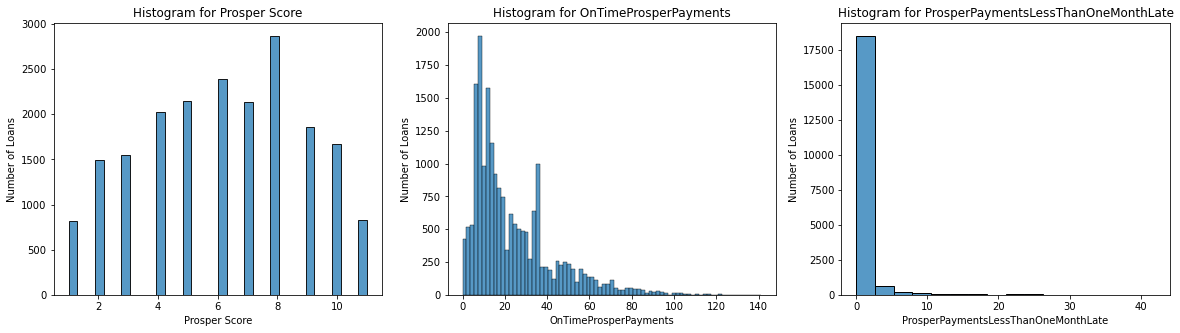

In [25]:
plt.figure(figsize=[20,5])
base_color = sns.color_palette()[0]

# Histogram for ProsperScore of loans
plt.subplot(1,3,1)
sns.histplot(data=loan_data_clean, x='ProsperScore' , color = base_color)
plt.title('Histogram for Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Number of Loans')

# Histogram for OnTimeProsperPayments
plt.subplot(1,3,2)
sns.histplot(data=loan_data_clean, x='OnTimeProsperPayments' , color = base_color)
plt.title('Histogram for OnTimeProsperPayments')
plt.xlabel('OnTimeProsperPayments')
plt.ylabel('Number of Loans')

# Histogram for ProsperPaymentsLessThanOneMonthLate
plt.subplot(1,3,3)
sns.histplot(data=loan_data_clean, x='ProsperPaymentsLessThanOneMonthLate' , color = base_color)
plt.title('Histogram for ProsperPaymentsLessThanOneMonthLate')
plt.xlabel('ProsperPaymentsLessThanOneMonthLate')
plt.ylabel('Number of Loans');

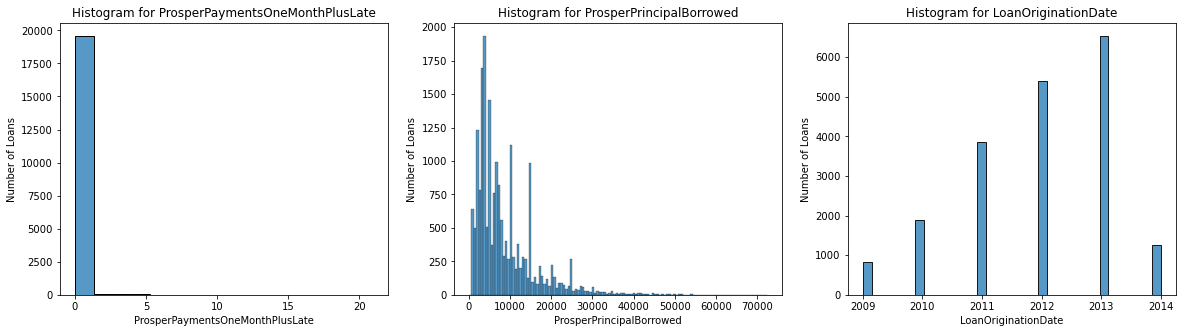

In [26]:
plt.figure(figsize=[20,5])
base_color = sns.color_palette()[0]

# Histogram for ProsperPaymentsOneMonthPlusLate of loans
plt.subplot(1,3,1)
sns.histplot(data=loan_data_clean, x='ProsperPaymentsOneMonthPlusLate' , color = base_color)
plt.title('Histogram for ProsperPaymentsOneMonthPlusLate')
plt.xlabel('ProsperPaymentsOneMonthPlusLate')
plt.ylabel('Number of Loans')

# Histogram for ProsperPrincipalBorrowed
plt.subplot(1,3,2)
sns.histplot(data=loan_data_clean, x='ProsperPrincipalBorrowed' , color = base_color)
plt.title('Histogram for ProsperPrincipalBorrowed')
plt.xlabel('ProsperPrincipalBorrowed')
plt.ylabel('Number of Loans')

# Histogram for LoanOriginationDate
plt.subplot(1,3,3)
sns.histplot(data=loan_data_clean, x='LoanOriginationDate' , color = base_color)
plt.title('Histogram for LoanOriginationDate')
plt.xlabel('LoanOriginationDate')
plt.ylabel('Number of Loans');

* From the histogram plots made for quantitative variables, it appears that log transformation needs to be carried out on some of the variables to make them normally distributed as the data points are skewed to one direction.

* Below is log transformation made on some variables to make them normally distributed.

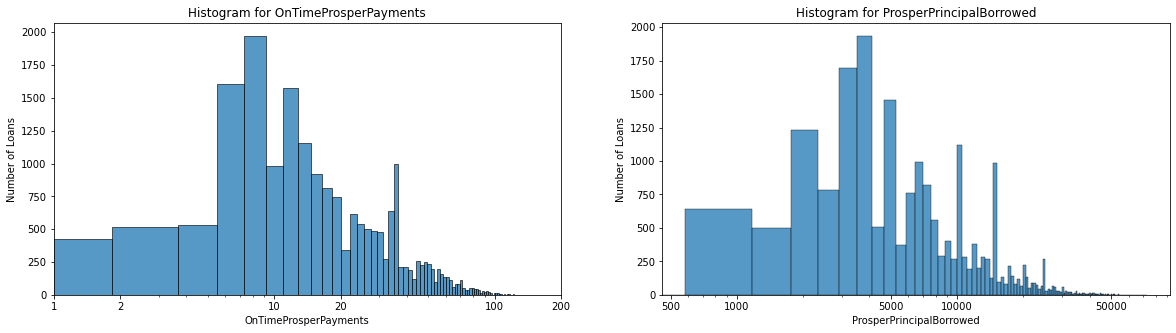

In [27]:
# Histogram plots for log-transformed variables
plt.figure(figsize=[20,5])
base_color = sns.color_palette()[0]

# Histogram for OnTimeProsperPayments
plt.subplot(1,2,1)
bin_width = 0.2
bins = 10**np.arange(0,np.log10(loan_data_clean['OnTimeProsperPayments'].describe().max())+bin_width, bin_width)

sns.histplot(data=loan_data_clean, x='OnTimeProsperPayments',color = base_color)
ticks = [1,2,10,20,100,200]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks=ticks, labels= labels)
plt.title('Histogram for OnTimeProsperPayments')
plt.xlabel('OnTimeProsperPayments')
plt.ylabel('Number of Loans');

# Histogram for ProsperPrincipalBorrowed
plt.subplot(1,2,2)
bin_width = 0.2
bins = 10**np.arange(0,np.log10(loan_data_clean['ProsperPrincipalBorrowed'].describe().max())+bin_width, bin_width)

sns.histplot(data=loan_data_clean, x='ProsperPrincipalBorrowed' , color = base_color)
ticks = [500,1000,5000,10000,50000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks=ticks, labels= labels)
plt.title('Histogram for ProsperPrincipalBorrowed')
plt.xlabel('ProsperPrincipalBorrowed')
plt.ylabel('Number of Loans');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the data points of OnTimeProsperPayments and ProsperPrincipalBorrowed variables are right-skewed, so the log transformation was performed to make the data normally distributed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The data type of the following variables were changed to enable for further analysis:
* ListingCategory: The data type of the variable was changed from integer to ordered category as they were not actually quantitative data but categorical data.
* LoanOriginationDate: The datatype of the variable, which actually is of datetime variable, was changed from string to datetime.

## Bivariate Exploration

First investigating the relationship between numeric variables.

In [28]:
# Groupping list of variables 
num_var = ['Term','BorrowerAPR','BorrowerRate','LenderYield','ProsperScore','AmountDelinquent',
           'TotalProsperLoans','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate',
           'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','LoanOriginalAmount','LoanOriginationDate']

cat_var = ['LoanStatus','ListingCategory','EmploymentStatus','BorrowerState']

# Extracting sample from the loan_data_clean for values of BorrowerState as 'NM', 'MA','AR', and 'SD'
loan_data_clean_samp = loan_data_clean.query("BorrowerState == ['NM', 'MA','AR', 'SD']")

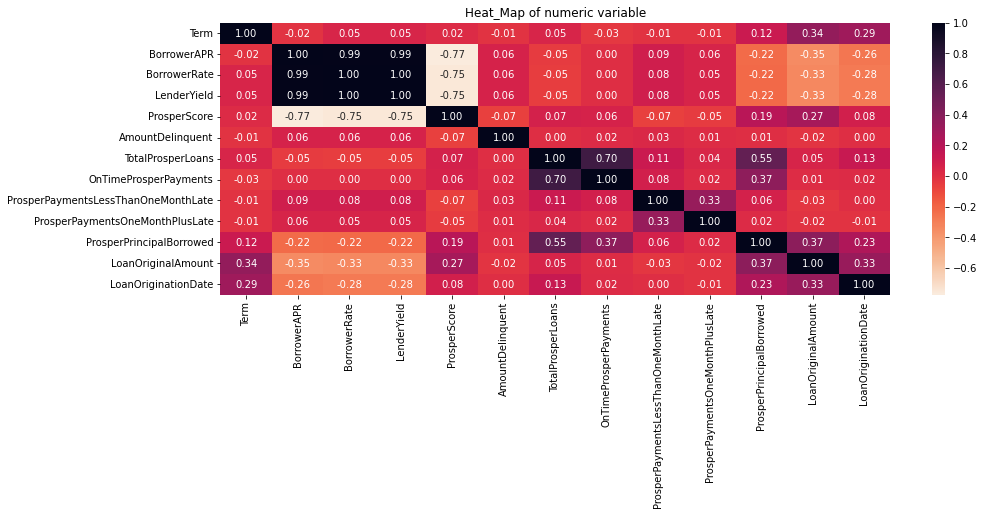

In [29]:
# Obtaining the correlation between numeric variales
plt.figure(figsize=[15,5])
sns.heatmap(loan_data_clean[num_var].corr(), annot=True, cmap='rocket_r', fmt='.2f')
plt.xticks(rotation=90)
plt.title('Heat_Map of numeric variable');

In [30]:
# Creating function for log transformation
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)

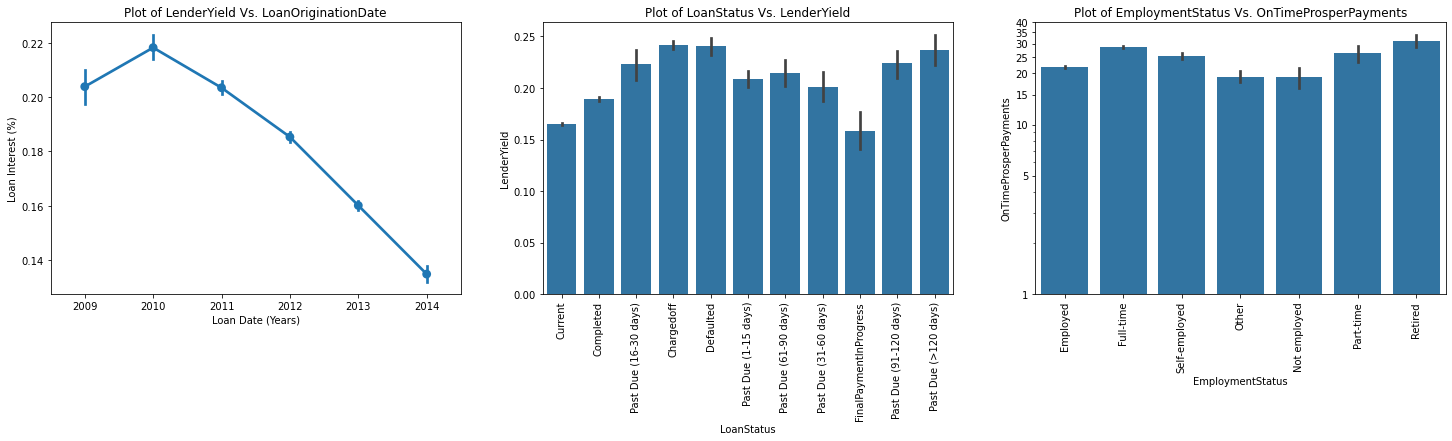

In [31]:
# Plotting of variables
plt.figure(figsize=[25,5])
base_color = sns.color_palette()[0]
# Lineplot of LenderYield and Loan date
plt.subplot(1,3,1)
sns.pointplot(data= loan_data_clean,x = 'LoanOriginationDate', y = 'LenderYield')
plt.title('Plot of LenderYield Vs. LoanOriginationDate')
plt.xlabel('Loan Date (Years)')
plt.ylabel('Loan Interest (%)');

# Bar plot of LoanStatus and LenderYield
plt.subplot(1,3,2)
sns.barplot(data=loan_data_clean, x='LoanStatus', y='LenderYield', color=base_color)
plt.title('Plot of LoanStatus Vs. LenderYield')
plt.xlabel('LoanStatus')
plt.ylabel('LenderYield')
plt.xticks(rotation=90);

#Plot of EmploymentStatus Vs. OnTimeProsperPayments
plt.subplot(1,3,3)
sns.barplot(data=loan_data_clean, x='EmploymentStatus', y='OnTimeProsperPayments'
            , color=base_color)
ticks = [1,5,10,15,20,25,30,35,40]
labels = ['{}'.format(v) for v in ticks]
plt.yscale('log')
plt.title('Plot of EmploymentStatus Vs. OnTimeProsperPayments')
plt.xlabel('EmploymentStatus')
plt.ylabel('OnTimeProsperPayments')
plt.xticks(rotation=90)
plt.yticks(ticks,labels);

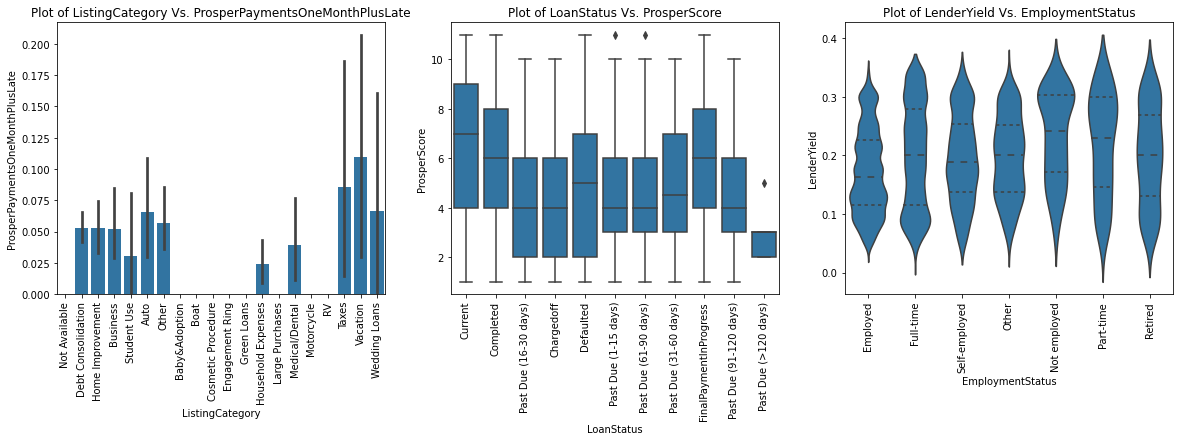

In [32]:
plt.figure(figsize=[20,5])
base_color = sns.color_palette()[0]

#Plot of ListingCategory Vs. ProsperPaymentsOneMonthPlusLate
plt.subplot(1,3,1)
sns.barplot(data=loan_data_clean, x='ListingCategory', y='ProsperPaymentsOneMonthPlusLate',color=base_color)
plt.title('Plot of ListingCategory Vs. ProsperPaymentsOneMonthPlusLate')
plt.xlabel('ListingCategory')
plt.ylabel('ProsperPaymentsOneMonthPlusLate')
plt.xticks(rotation=90);

# Plot of LoanStatus Vs. ProsperScore
plt.subplot(1,3,2)
sns.boxplot(data=loan_data_clean, x='LoanStatus', y='ProsperScore',color=base_color)
plt.title('Plot of LoanStatus Vs. ProsperScore')
plt.xlabel('LoanStatus')
plt.ylabel('ProsperScore')
plt.xticks(rotation=90);

# Plot of LenderYield and EmploymentStatus
plt.subplot(1,3,3)
sns.violinplot(data=loan_data_clean, x='EmploymentStatus', y='LenderYield',color=base_color, inner='quartile')
plt.title('Plot of LenderYield Vs. EmploymentStatus')
plt.xlabel('EmploymentStatus')
plt.ylabel('LenderYield')
plt.xticks(rotation=90);

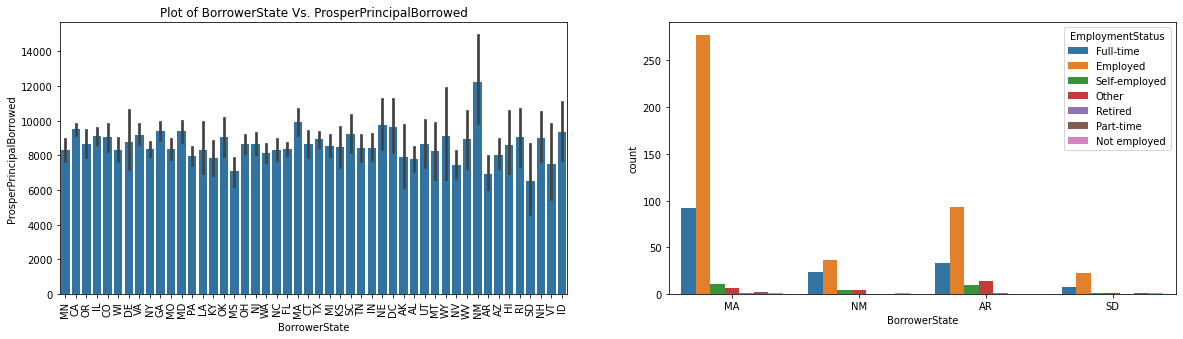

In [48]:
plt.figure(figsize=[20,5])
# Plot of BorrowerState and ProsperPrincipalBorrowed
plt.subplot(1,2,1)
sns.barplot(data=loan_data_clean, x='BorrowerState', y='ProsperPrincipalBorrowed',color=base_color)
plt.title('Plot of BorrowerState Vs. ProsperPrincipalBorrowed')
plt.xlabel('BorrowerState')
plt.ylabel('ProsperPrincipalBorrowed')
plt.xticks(rotation=90);

# Plot of BorrowerState and EmploymentStatus
plt.subplot(1,2,2)
ax = sns.countplot(data=loan_data_clean_samp, x='BorrowerState', hue='EmploymentStatus')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The following observations were made after the plots:
* The LenderYield, which is equivalent to the annual interest rate, on the loan got to its peak at the second year period; however, it declined sharply in subsequent years.
* There is increase in the value of LenderYield for longer period of repayment of loans. This may be an advantage for the Lender as more income is generated.
* The relationship between prosperscore and loanstatus shows that loans become bad or have high risk when they exceed their repayment dates. For example, the risk of recovering loans that have exceeded 120 days of repayment is very high even though it has high yield to the lender.
* In the relationship between the lender yield and employment status: Lender yield tends to be high for those with less income than those with high income. This may be as a result of the possibility for those with high income to repay loans ontime than those with less income. For example, the value of lender yield for 'not-employed' folks is more, but less for the employed. This could be a pointer that the lender wanted high-income earners to take more loans in order to increase their income generation.
* Relationship between ProsperScore and LenderYield:ProsperScore has strong negative relationship with LenderYield. This implies that loans with high interest rate are very risky to the lender.
* LenderYield, BorrowerAPR and BorrowerRate are strongly related.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The following observations were made from the relationships of other features.:
* Relationship between BorrowerState and ProsperPrincipalBorrowed: NM took more loan principals than any other state, while SD took the least amount of loans.
* For the relationship between ListingCategory Vs. ProsperPaymentsOneMonthPlusLate: Borrowers on vacation have the highest number of defaulters, while borrowers in the category of Taxes.
* For EmploymentStatus Vs. OnTimeProsperPayments: Retired borrowers have the highest number for loans repaid ontime, while other and not-employed have the lowest number for loans paid ontime.
* For the relationships between numeric variables: Other numeric variables don't usually have much effect or related to each other. 

## Multivariate Exploration

Investigations on the relationships for more than two variables will be carried out on the dataset

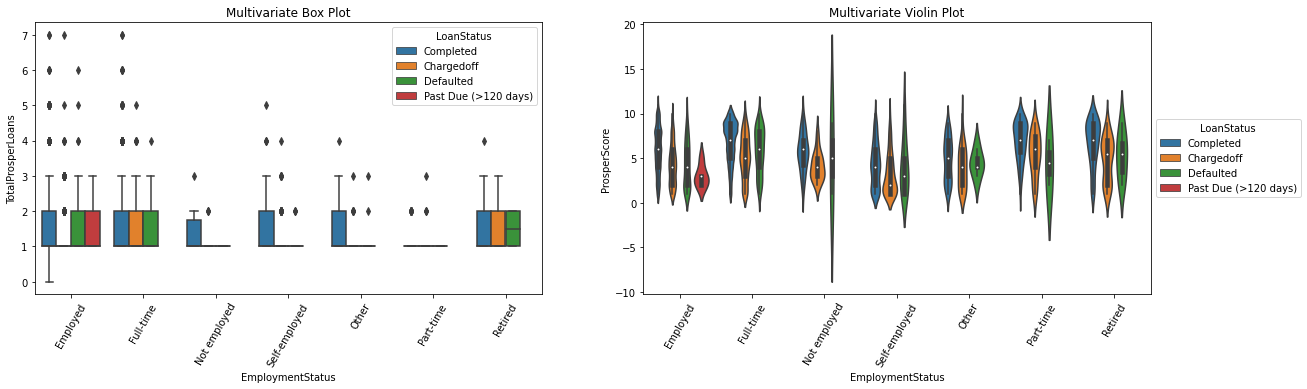

In [34]:
plt.figure(figsize=[20,5])

# Selecting sample of four levels from LoanStatus variable
loan_data_clean_sub = loan_data_clean.loc[loan_data_clean['LoanStatus'].isin(['Completed', 
                                                                              'Chargedoff','Defaulted','Past Due (>120 days)'])]

# plotting graph
plt.subplot(1,2,1)
sns.boxplot(data = loan_data_clean_sub, x = 'EmploymentStatus', y = 'TotalProsperLoans', 
               hue = 'LoanStatus')
plt.legend(loc = 'upper right',title = 'LoanStatus')
plt.xticks(rotation = 60)
plt.title('Multivariate Box Plot')
plt.ylabel('TotalProsperLoans')
plt.xlabel('EmploymentStatus');


# plotting graph
plt.subplot(1,2,2)
sns.violinplot(data = loan_data_clean_sub, x = 'EmploymentStatus', y = 'ProsperScore', 
               hue = 'LoanStatus')
plt.legend(title = 'LoanStatus', loc = 6, bbox_to_anchor = (1.0, 0.5)) # Placing legend to right of figure
plt.xticks(rotation = 60)
plt.title('Multivariate Violin Plot')
plt.ylabel('ProsperScore')
plt.xlabel('EmploymentStatus');

C:\Users\HP 840 G2\anaconda3\envs\myproject_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


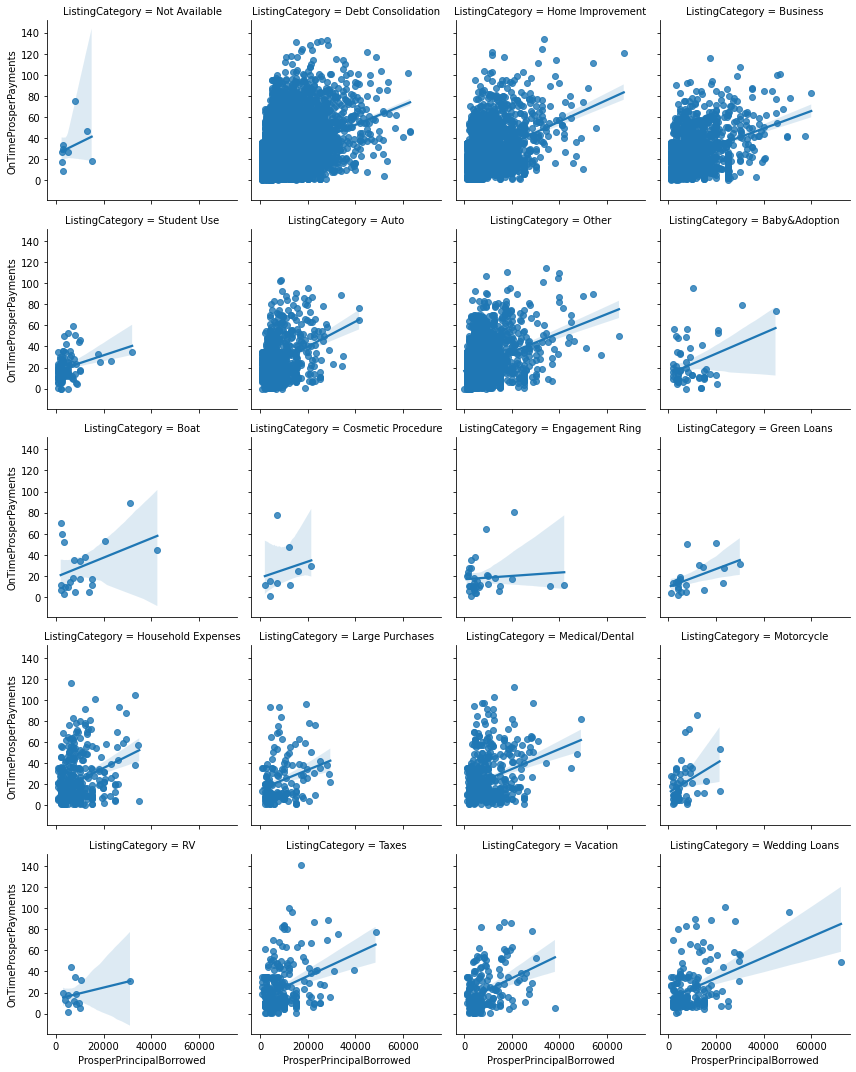

In [35]:
# Making multivariate plots of categorical and numeric variables
bese_color = sns.color_palette()[0]
g = sns.FacetGrid(data=loan_data_clean, col='ListingCategory', size=3, col_wrap=4)
g.map(sns.regplot, 'ProsperPrincipalBorrowed','OnTimeProsperPayments', color = base_color);

C:\Users\HP 840 G2\anaconda3\envs\myproject_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


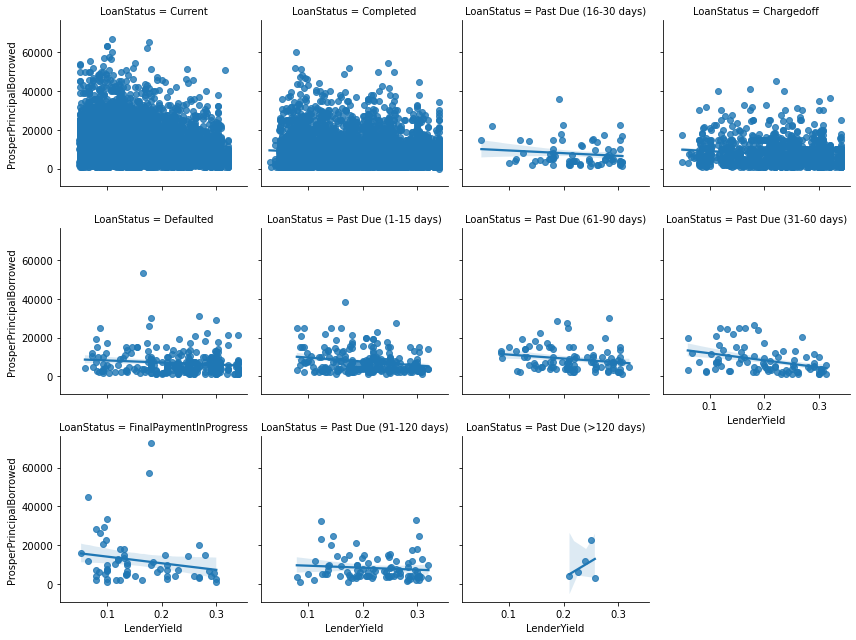

In [36]:
# Making multivariate plots of LoanStatus, LenderYield and ProsperPrincipalBorrowed variables
bese_color = sns.color_palette()[0]
g = sns.FacetGrid(data=loan_data_clean, col='LoanStatus', size=3, col_wrap=4)
g.map(sns.regplot, 'LenderYield','ProsperPrincipalBorrowed', color = base_color);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

By making multivariate plots of the variables from the dataset, the following observations are made concerning relationships:

* Loan status that has passed due date of more than 120 days has high risk to the lender. Only employed borrowers have loans that have exceeded due date of 120 days. The lender has more risky chargedoff loans from self-employed borrowers than the other selected employment status of borrowers.

* The employed borrowers have more loans that have defaulted than other selected employment-status borrowers. The employed and full-time borrowers have the highest number of completed loans.

* The larger the amount of principal borrowed, the less value is the lender yield (interest rate). While loans that are going bad or that have high risk lead to high lender yield, it seems to appear that loans with low principal amount tend to turn bad for the borrower.

### Were there any interesting or surprising interactions between features?

There wasn't much interesting interactions between features except that I was surprised at the fact that employed borrowers defaulted more in loans repayment than any other category of selected employment status of borrowers. Also, I supposed that larger amount of principal would return high interest rate, but that wasn't the case here. I deduced that the lender intended for borrowers to take more loans that was the reason for low interest rate on loans of higher amount.

## Summary Reporting

In conclusion, having followed the outlined steps as provided in the introduction of this project, the following conclusions are drawn:

1. There was a steady fall in the lender yield (interest rate of the borrower) in subsequent years immediately after it attained it highest point in the second year, 2010.

2. Although with a higher loan risk, the lender tends to have high interest rate for loans that default. Loans that exceed 120 days of repayment have high risk and can become chargedoff loans to the lender.

3. More loans are taken by the employed section of the borrower than any other. 

4. There is high risk for loans with high lender yield.

5. NM state had borrowers with the highest loan principal taken, while SD state had borrowers taking the least principal loan amount.

6. The employed borrowers have more loans that have defaulted than other selected employment-status borrowers. The employed and full-time borrowers have the highest number of completed loans.

7. The larger the amount of principal borrowed, the less value is the lender yield (interest rate). While loans that are going bad or that have high risk lead to high lender yield, it seems to appear that loans with low principal amount tend to turn bad for the borrower.

8. The earlier the loans repaid, the more loans the lender is willing to give out as shown in the strong positive relationship betweem OnTimeProsperPayments and TotalProsperLoans.

9. Changes in the amount of loans delinquents can not be determined from other numeric variables as selected for this project.

10. BorrowerAPR, BorrowerRate and LenderYield all have the same effect as the interest rate as they have very strong positive correlation.

## Conclusion

The conclusions drawn from the analysis of the data set are given below :
* More loans are taken by borrowers that are employed.
* Loans with high lender yield have high risk.
* Employed borrowers have more loans that defaulted.
* Loans with large capital amount have low interest rate than loans with small capital amount.
* There is high risk for defaulting loans than the ones that are repaid as timely as possible. That is the probability of loans becoming bad is high for those that default. This implies that Prosper score has direct impact on the loan status.